<a href="https://colab.research.google.com/github/plaban1981/Pharmaceutical-Classification/blob/master/Pharma_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Problem Statement :

One of the challenge for all Pharmaceutical companies is to understand the persistencyof drug as per the physician prescription.

With an objective to gather insights on the factors that are impacting the persistency ,build a classification for the given dataset.


#### Target Varaiable : Persistency_Flag

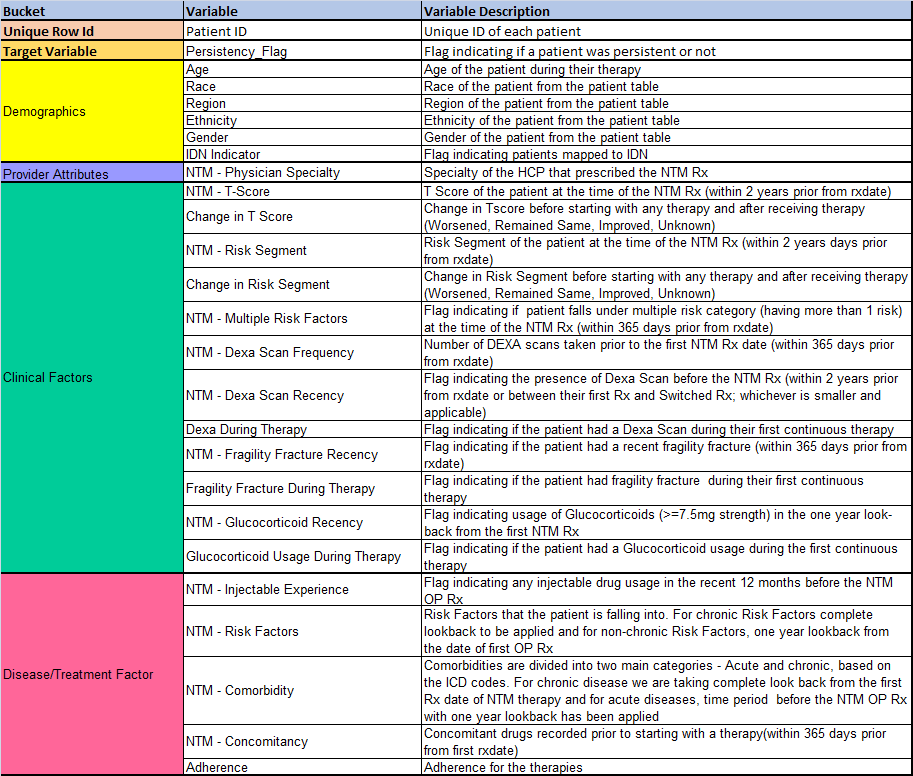

## Import Libraries

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Import Training Data

In [141]:
df = pd.read_csv('/content/drive/My Drive/pharma.csv')
df.head()

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,Gluco_Record_Prior_Ntm,Gluco_Record_During_Rx,Dexa_Freq_During_Rx,Dexa_During_Rx,Frag_Frac_Prior_Ntm,Frag_Frac_During_Rx,Risk_Segment_Prior_Ntm,Tscore_Bucket_Prior_Ntm,Risk_Segment_During_Rx,Tscore_Bucket_During_Rx,Change_T_Score,Change_Risk_Segment,Adherent_Flag,Idn_Indicator,Injectable_Experience_During_Rx,Comorb_Encounter_For_Screening_For_Malignant_Neoplasms,Comorb_Encounter_For_Immunization,"Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx",Comorb_Vitamin_D_Deficiency,Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified,Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx,Comorb_Long_Term_Current_Drug_Therapy,Comorb_Dorsalgia,Comorb_Personal_History_Of_Other_Diseases_And_Conditions,Comorb_Other_Disorders_Of_Bone_Density_And_Structure,Comorb_Disorders_of_lipoprotein_metabolism_and_other_lipidemias,Comorb_Osteoporosis_without_current_pathological_fracture,Comorb_Personal_history_of_malignant_neoplasm,Comorb_Gastro_esophageal_reflux_disease,Concom_Cholesterol_And_Triglyceride_Regulating_Preparations,Concom_Narcotics,Concom_Systemic_Corticosteroids_Plain,Concom_Anti_Depressants_And_Mood_Stabilisers,Concom_Fluoroquinolones,Concom_Cephalosporins,Concom_Macrolides_And_Similar_Types,Concom_Broad_Spectrum_Penicillins,Concom_Anaesthetics_General,Concom_Viral_Vaccines,Risk_Type_1_Insulin_Dependent_Diabetes,Risk_Osteogenesis_Imperfecta,Risk_Rheumatoid_Arthritis,Risk_Untreated_Chronic_Hyperthyroidism,Risk_Untreated_Chronic_Hypogonadism,Risk_Untreated_Early_Menopause,Risk_Patient_Parent_Fractured_Their_Hip,Risk_Smoking_Tobacco,Risk_Chronic_Malnutrition_Or_Malabsorption,Risk_Chronic_Liver_Disease,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
0,P1,Persistent,Male,Caucasian,Not Hispanic,West,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,N,0,N,N,N,VLR_LR,>-2.5,VLR_LR,<=-2.5,No change,Unknown,Adherent,N,Y,N,Y,Y,N,N,Y,N,Y,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,0
1,P2,Non-Persistent,Male,Asian,Not Hispanic,West,55-65,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,N,0,N,N,N,VLR_LR,>-2.5,Unknown,Unknown,Unknown,Unknown,Adherent,N,Y,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,0
2,P3,Non-Persistent,Female,Other/Unknown,Hispanic,Midwest,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,N,0,N,N,N,HR_VHR,<=-2.5,HR_VHR,<=-2.5,No change,No change,Adherent,N,Y,Y,N,Y,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,Y,N,N,N,N,N,N,N,2
3,P4,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,Y,0,N,N,N,HR_VHR,>-2.5,HR_VHR,<=-2.5,No change,No change,Adherent,N,Y,N,Y,Y,N,Y,N,N,Y,N,N,Y,N,N,Y,N,Y,Y,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,1
4,P5,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,Y,Y,0,N,N,N,HR_VHR,<=-2.5,Unknown,Unknown,Unknown,Unknown,Adherent,N,Y,Y,Y,Y,N,N,N,N,Y,Y,N,N,N,N,N,N,Y,Y,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,1


## Check if the training dataset is balanced

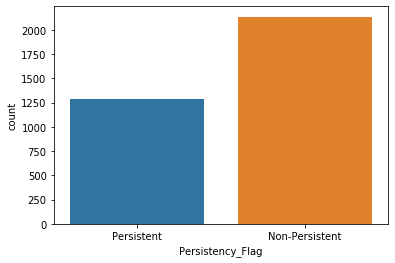

In [142]:
sns.countplot(x='Persistency_Flag',data=df)

## Check for Missing Values if any

In [143]:
df.isnull().sum()[df.isnull().sum() > 0]

Series([], dtype: int64)

## Datset Schema

In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3424 entries, 0 to 3423
Data columns (total 69 columns):
Ptid                                                                  3424 non-null object
Persistency_Flag                                                      3424 non-null object
Gender                                                                3424 non-null object
Race                                                                  3424 non-null object
Ethnicity                                                             3424 non-null object
Region                                                                3424 non-null object
Age_Bucket                                                            3424 non-null object
Ntm_Speciality                                                        3424 non-null object
Ntm_Specialist_Flag                                                   3424 non-null object
Ntm_Speciality_Bucket                                                 3424

In [145]:
df.shape

(3424, 69)

## Selecting Features and Labels to be considered

In [0]:
X = df.drop(['Ptid','Persistency_Flag'],axis=1)
Y = df['Persistency_Flag']

## Label Encoding categorical Values

In [0]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
for col in X.columns:
  X[col] = label_encoder.fit_transform(X[col])

In [148]:
X.head()

,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,Gluco_Record_Prior_Ntm,Gluco_Record_During_Rx,Dexa_Freq_During_Rx,Dexa_During_Rx,Frag_Frac_Prior_Ntm,Frag_Frac_During_Rx,Risk_Segment_Prior_Ntm,Tscore_Bucket_Prior_Ntm,Risk_Segment_During_Rx,Tscore_Bucket_During_Rx,Change_T_Score,Change_Risk_Segment,Adherent_Flag,Idn_Indicator,Injectable_Experience_During_Rx,Comorb_Encounter_For_Screening_For_Malignant_Neoplasms,Comorb_Encounter_For_Immunization,"Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx",Comorb_Vitamin_D_Deficiency,Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified,Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx,Comorb_Long_Term_Current_Drug_Therapy,Comorb_Dorsalgia,Comorb_Personal_History_Of_Other_Diseases_And_Conditions,Comorb_Other_Disorders_Of_Bone_Density_And_Structure,Comorb_Disorders_of_lipoprotein_metabolism_and_other_lipidemias,Comorb_Osteoporosis_without_current_pathological_fracture,Comorb_Personal_history_of_malignant_neoplasm,Comorb_Gastro_esophageal_reflux_disease,Concom_Cholesterol_And_Triglyceride_Regulating_Preparations,Concom_Narcotics,Concom_Systemic_Corticosteroids_Plain,Concom_Anti_Depressants_And_Mood_Stabilisers,Concom_Fluoroquinolones,Concom_Cephalosporins,Concom_Macrolides_And_Similar_Types,Concom_Broad_Spectrum_Penicillins,Concom_Anaesthetics_General,Concom_Viral_Vaccines,Risk_Type_1_Insulin_Dependent_Diabetes,Risk_Osteogenesis_Imperfecta,Risk_Rheumatoid_Arthritis,Risk_Untreated_Chronic_Hyperthyroidism,Risk_Untreated_Chronic_Hypogonadism,Risk_Untreated_Early_Menopause,Risk_Patient_Parent_Fractured_Their_Hip,Risk_Smoking_Tobacco,Risk_Chronic_Malnutrition_Or_Malabsorption,Risk_Chronic_Liver_Disease,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
0,1,2,1,4,3,5,0,1,0,0,0,0,0,0,1,1,2,0,1,2,0,0,1,0,1,1,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,1,4,0,5,0,1,0,0,0,0,0,0,1,1,1,2,2,2,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,3,0,0,1,5,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,2
3,0,2,1,0,3,5,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,1,1,0,1,0,0,1,0,0,1,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
4,0,2,1,0,3,5,0,1,1,1,0,0,0,0,0,0,1,2,2,2,0,0,1,1,1,1,0,0,0,0,1,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1


## Chi-Square Test for Feature Selection

**A chi-square test is used in statistics to test the independence of two events.** Given the data of two variables, we can get observed count **O** and expected count **E**. Chi-Square measures how expected count E and observed count O deviates each other.

In [0]:
from sklearn.feature_selection import chi2
chi_scores = chi2(X,Y)

In [150]:
chi_scores

(array([3.45521380e-01, 1.19251638e-03, 5.03063429e-04, 3.54171421e+01,
        1.18833764e-02, 3.54213101e-01, 3.91097671e+01, 1.72590487e+01,
        8.68247655e-02, 1.14102634e+02, 8.09789507e+03, 6.01821735e+02,
        2.90232661e-04, 3.43856446e+01, 2.23056944e-01, 5.26354351e-01,
        9.43887166e-04, 4.93680192e+01, 7.49955094e+00, 2.08429398e-01,
        4.11367793e+01, 1.07671690e+01, 3.56031863e+00, 1.96456669e+02,
        1.89482869e+02, 1.74048681e+02, 6.94939799e+01, 1.31966226e+02,
        1.19920609e+02, 3.24413431e+02, 1.22614004e+02, 1.32550290e+02,
        1.77698458e+02, 4.43461277e+01, 4.90811420e+01, 8.48241176e+01,
        1.36023052e+02, 3.53410720e+01, 8.06936685e+01, 1.44555145e+02,
        2.98508448e+01, 9.66159106e+01, 1.38458954e+02, 1.40114405e+02,
        1.16851453e+02, 1.44635050e+02, 1.51679540e+02, 1.22724697e+00,
        2.37703404e-02, 9.53761404e+00, 1.20749415e+00, 1.50610840e+01,
        9.50813616e-02, 2.18812761e-01, 2.67234717e+01, 7.138512

#### Here first array represents chi square values and second array represnts p-values

In [151]:
chi_scores[0]

array([3.45521380e-01, 1.19251638e-03, 5.03063429e-04, 3.54171421e+01,
       1.18833764e-02, 3.54213101e-01, 3.91097671e+01, 1.72590487e+01,
       8.68247655e-02, 1.14102634e+02, 8.09789507e+03, 6.01821735e+02,
       2.90232661e-04, 3.43856446e+01, 2.23056944e-01, 5.26354351e-01,
       9.43887166e-04, 4.93680192e+01, 7.49955094e+00, 2.08429398e-01,
       4.11367793e+01, 1.07671690e+01, 3.56031863e+00, 1.96456669e+02,
       1.89482869e+02, 1.74048681e+02, 6.94939799e+01, 1.31966226e+02,
       1.19920609e+02, 3.24413431e+02, 1.22614004e+02, 1.32550290e+02,
       1.77698458e+02, 4.43461277e+01, 4.90811420e+01, 8.48241176e+01,
       1.36023052e+02, 3.53410720e+01, 8.06936685e+01, 1.44555145e+02,
       2.98508448e+01, 9.66159106e+01, 1.38458954e+02, 1.40114405e+02,
       1.16851453e+02, 1.44635050e+02, 1.51679540e+02, 1.22724697e+00,
       2.37703404e-02, 9.53761404e+00, 1.20749415e+00, 1.50610840e+01,
       9.50813616e-02, 2.18812761e-01, 2.67234717e+01, 7.13851263e+00,
      

#### P values

In [152]:
df_p_val = pd.DataFrame({'Features': X.columns ,'p_value': chi_scores[1]},index=X.columns)
df_p_val

,Features,p_value
Gender,Gender,5.566594e-01
Race,Race,9.724523e-01
Ethnicity,Ethnicity,9.821057e-01
Region,Region,2.661343e-09
Age_Bucket,Age_Bucket,9.131938e-01
...,...,...
Risk_Hysterectomy_Oophorectomy,Risk_Hysterectomy_Oophorectomy,3.497941e-01
Risk_Estrogen_Deficiency,Risk_Estrogen_Deficiency,4.776399e-01
Risk_Immobilization,Risk_Immobilization,3.645502e-03
Risk_Recurring_Falls,Risk_Recurring_Falls,2.163266e-01


In [0]:
df_p_val.sort_values(by='p_value',ascending=True,inplace=True)

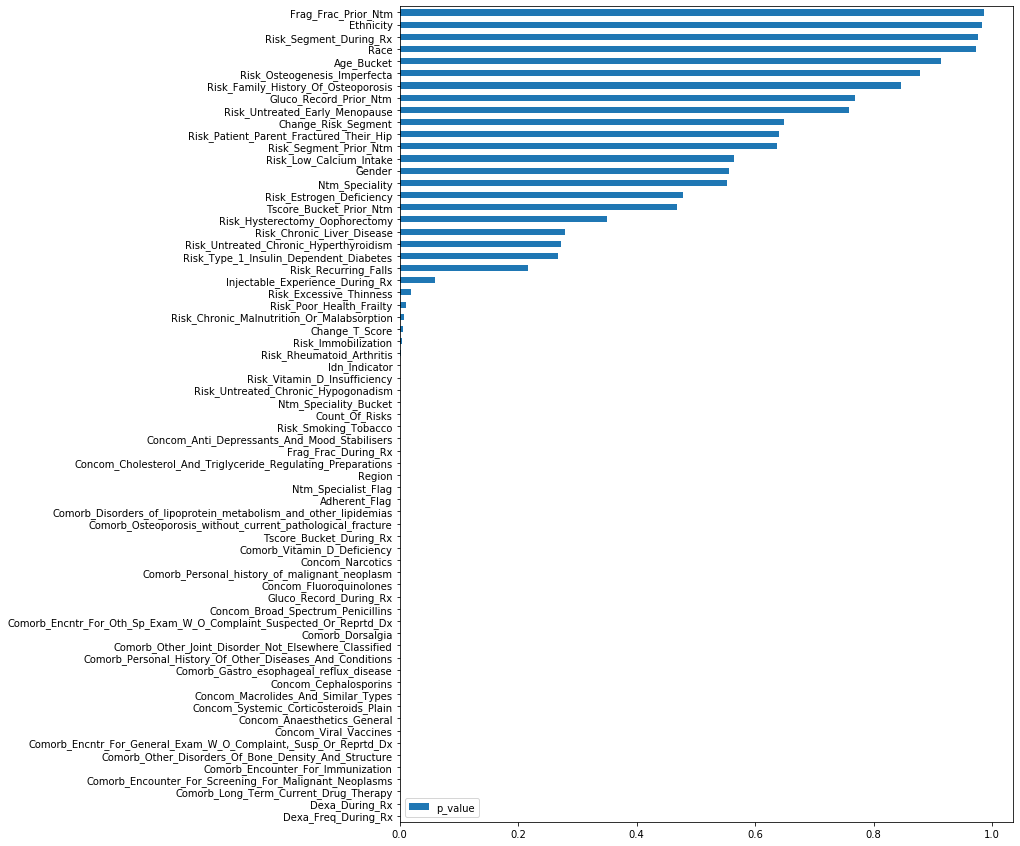

In [154]:
df_p_val.plot.barh(figsize=(11,15))

In [0]:
p_values = pd.Series(chi_scores[1],index = X.columns)
p_values.sort_values(ascending = False , inplace = True)

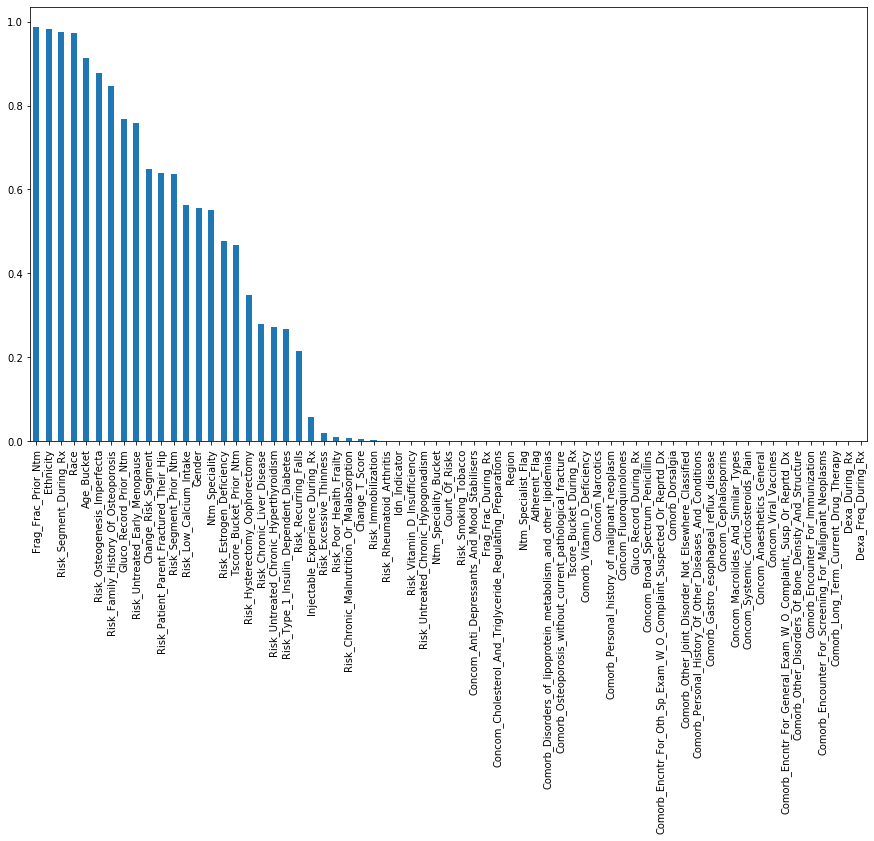

In [156]:
plt.figure(figsize=(15,8))
p_values.plot.bar()

https://github.com/gsampath127/Feature-Selection/blob/master/FeatureSelection_ChiSquareTest.ipynb

https://towardsdatascience.com/chi-square-test-for-feature-selection-in-machine-learning-206b1f0b8223

####  In feature selection, we aim to select the features which are highly dependent on the response.

When two features are independent, the observed count is close to the expected count, thus we will have smaller Chi-Square value. So high Chi-Square value indicates that the hypothesis of independence is incorrect. In simple words, higher the Chi-Square value the feature is more dependent on the response and it can be selected for model training.

In [0]:
Independent_features = df_p_val['Features'][df_p_val['p_value'] < 0.05].to_list()

In [158]:
len(Independent_features)

44

In [0]:
dependent_features = df_p_val['Features'][df_p_val['p_value'] >= 0.05].to_list()

In [160]:
len(dependent_features)

23

## New Features

In [161]:
X_new = df[dependent_features]
print(X_new.shape)
print(Y.shape)

(3424, 23)
(3424,)


In [162]:
X_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3424 entries, 0 to 3423
Data columns (total 23 columns):
Injectable_Experience_During_Rx            3424 non-null object
Risk_Recurring_Falls                       3424 non-null object
Risk_Type_1_Insulin_Dependent_Diabetes     3424 non-null object
Risk_Untreated_Chronic_Hyperthyroidism     3424 non-null object
Risk_Chronic_Liver_Disease                 3424 non-null object
Risk_Hysterectomy_Oophorectomy             3424 non-null object
Tscore_Bucket_Prior_Ntm                    3424 non-null object
Risk_Estrogen_Deficiency                   3424 non-null object
Ntm_Speciality                             3424 non-null object
Gender                                     3424 non-null object
Risk_Low_Calcium_Intake                    3424 non-null object
Risk_Segment_Prior_Ntm                     3424 non-null object
Risk_Patient_Parent_Fractured_Their_Hip    3424 non-null object
Change_Risk_Segment                        3424 non-null obje

## Splitting the data into Training set and test set



In [163]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_new,Y,test_size=0.15,random_state=1)
print(X_train.shape)
print(X_test.shape)

(2910, 23)
(514, 23)


## Applying Label Encoding Separatley in order to avoid data leakages

In [164]:
print(X_train.columns)

Index(['Injectable_Experience_During_Rx', 'Risk_Recurring_Falls',
       'Risk_Type_1_Insulin_Dependent_Diabetes',
       'Risk_Untreated_Chronic_Hyperthyroidism', 'Risk_Chronic_Liver_Disease',
       'Risk_Hysterectomy_Oophorectomy', 'Tscore_Bucket_Prior_Ntm',
       'Risk_Estrogen_Deficiency', 'Ntm_Speciality', 'Gender',
       'Risk_Low_Calcium_Intake', 'Risk_Segment_Prior_Ntm',
       'Risk_Patient_Parent_Fractured_Their_Hip', 'Change_Risk_Segment',
       'Risk_Untreated_Early_Menopause', 'Gluco_Record_Prior_Ntm',
       'Risk_Family_History_Of_Osteoporosis', 'Risk_Osteogenesis_Imperfecta',
       'Age_Bucket', 'Race', 'Risk_Segment_During_Rx', 'Ethnicity',
       'Frag_Frac_Prior_Ntm'],
      dtype='object')


In [165]:
for col in X_train.columns:
  X_train[col]= label_encoder.fit_transform(X_train[col]) 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [166]:
X_train.head()

,Injectable_Experience_During_Rx,Risk_Recurring_Falls,Risk_Type_1_Insulin_Dependent_Diabetes,Risk_Untreated_Chronic_Hyperthyroidism,Risk_Chronic_Liver_Disease,Risk_Hysterectomy_Oophorectomy,Tscore_Bucket_Prior_Ntm,Risk_Estrogen_Deficiency,Ntm_Speciality,Gender,Risk_Low_Calcium_Intake,Risk_Segment_Prior_Ntm,Risk_Patient_Parent_Fractured_Their_Hip,Change_Risk_Segment,Risk_Untreated_Early_Menopause,Gluco_Record_Prior_Ntm,Risk_Family_History_Of_Osteoporosis,Risk_Osteogenesis_Imperfecta,Age_Bucket,Race,Risk_Segment_During_Rx,Ethnicity,Frag_Frac_Prior_Ntm
3345,1,0,0,0,0,0,0,0,28,0,0,0,0,2,0,0,1,0,3,2,1,1,0
490,1,0,0,0,0,0,0,0,5,0,0,0,0,1,0,0,0,0,3,2,0,1,0
2898,0,0,0,0,0,0,1,0,28,0,0,1,0,2,0,0,0,0,0,2,2,1,0
1036,1,0,0,0,0,0,1,0,3,0,0,1,0,2,0,0,0,0,1,2,2,1,0
3093,1,1,0,0,0,0,0,0,5,0,0,0,0,1,0,0,0,0,1,2,0,1,1


In [167]:
for col in X_test.columns:
  X_test[col]= label_encoder.fit_transform(X_test[col]) 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [168]:
X_test.head()

,Injectable_Experience_During_Rx,Risk_Recurring_Falls,Risk_Type_1_Insulin_Dependent_Diabetes,Risk_Untreated_Chronic_Hyperthyroidism,Risk_Chronic_Liver_Disease,Risk_Hysterectomy_Oophorectomy,Tscore_Bucket_Prior_Ntm,Risk_Estrogen_Deficiency,Ntm_Speciality,Gender,Risk_Low_Calcium_Intake,Risk_Segment_Prior_Ntm,Risk_Patient_Parent_Fractured_Their_Hip,Change_Risk_Segment,Risk_Untreated_Early_Menopause,Gluco_Record_Prior_Ntm,Risk_Family_History_Of_Osteoporosis,Risk_Osteogenesis_Imperfecta,Age_Bucket,Race,Risk_Segment_During_Rx,Ethnicity,Frag_Frac_Prior_Ntm
2543,1,0,0,0,0,0,0,0,2,0,0,0,0,2,0,0,0,0,1,2,1,1,0
2243,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0,1,2,0,1,0
1673,0,0,0,0,0,0,0,0,6,0,0,0,0,1,0,0,0,0,1,2,0,1,0
551,1,0,0,0,0,0,0,0,2,0,0,0,0,1,0,0,0,0,1,2,0,1,0
2433,1,0,0,0,0,0,1,0,13,0,0,1,0,2,0,1,0,0,1,3,1,1,0


##Applying Classification Algorithm

#### Random Forest Classifier

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
rf = RandomForestClassifier(random_state = 42)

## specify parameters and distributions to sample from

In [0]:
param_dist = {"max_depth": [100,150,200,300,350, None],
              "max_features": sp_randint(1, 11),
              "min_samples_split": sp_randint(2, 11),
              "min_samples_leaf": sp_randint(1, 11),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

In [171]:
random_search = RandomizedSearchCV(rf,param_distributions=param_dist,n_iter=10,cv=5,n_jobs=4,random_state=1,verbose=2)
random_search.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:   10.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:   13.5s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [172]:
random_search.best_estimator_

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=350, max_features=9,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [173]:
random_search.best_params_

{'bootstrap': False,
 'criterion': 'entropy',
 'max_depth': 350,
 'max_features': 9,
 'min_samples_leaf': 10,
 'min_samples_split': 7}

In [174]:
rf  = random_search.best_estimator_
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=350, max_features=9,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

##Predictions

In [0]:
y_pred = rf.predict(X_test)

##Acuuracy Score- Evaluation of the model

In [176]:
from sklearn.metrics import confusion_matrix,accuracy_score,auc
print(confusion_matrix(y_test,y_pred))

[[283  35]
 [171  25]]


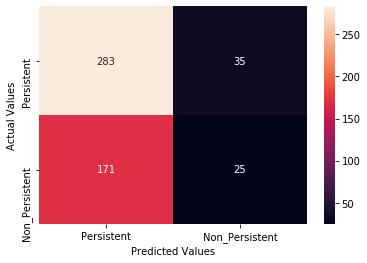

In [177]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='g',xticklabels=['Persistent','Non_Persistent'],yticklabels=['Persistent','Non_Persistent'])
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [178]:
print(f'Accuracy of the trained Model :{accuracy_score(y_test,y_pred)}')

Accuracy of the trained Model :0.5992217898832685


## Trying out with all Features

In [0]:
X = df.drop(['Ptid','Persistency_Flag'],axis=1)
Y = df['Persistency_Flag']

In [180]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.15,random_state=1)
print(X_train.shape)
print(X_test.shape)

(2910, 67)
(514, 67)


In [181]:
label_encoder = LabelEncoder()
for col in X_train.columns:
  X_train[col]= label_encoder.fit_transform(X_train[col]) 
for col in X_test.columns:
  X_test[col]= label_encoder.fit_transform(X_test[col]) 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [182]:
random_search = RandomizedSearchCV(rf,param_distributions=param_dist,n_iter=10,cv=5,n_jobs=4,random_state=1,verbose=2)
random_search.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    8.9s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:   12.8s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=False,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='entropy',
                                                    max_depth=350,
                                                    max_features=9,
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=10,
                                                    min_samples_split=7,
                                                    min_weight_fraction_leaf=0.0,
                

In [183]:
print(random_search.best_params_)

{'bootstrap': False, 'criterion': 'entropy', 'max_depth': 150, 'max_features': 8, 'min_samples_leaf': 1, 'min_samples_split': 8}


In [184]:
random_search.score(X_train,y_train)

0.9900343642611684

In [185]:
random_search.score(X_test,y_test)

0.8501945525291829

In [0]:
y_pred = random_search.predict(X_test)

In [187]:
print(f'Accuracy of the trained Model :{accuracy_score(y_pred,y_test)}')

Accuracy of the trained Model :0.8501945525291829


In [0]:
accuracy = {}
accuracy['RandomForestClassifier'] = accuracy_score(y_pred,y_test)

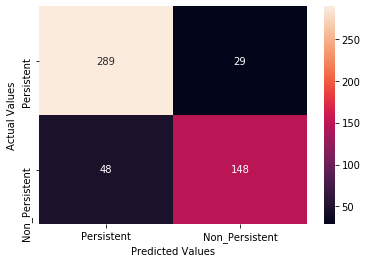

In [189]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='g',xticklabels=['Persistent','Non_Persistent'],yticklabels=['Persistent','Non_Persistent'])
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

##Applying Logistic Regression  with Cross Validation

In [0]:
from sklearn.linear_model import LogisticRegressionCV
lr_cv = LogisticRegressionCV(max_iter=1000)


In [0]:
X = df.drop(['Ptid','Persistency_Flag'],axis=1)
Y = df['Persistency_Flag']

In [0]:
label_encoder = LabelEncoder()
for col in X.columns:
  X[col] = label_encoder.fit_transform(X[col])

In [193]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.15,random_state=1)
print(X_train.shape)
print(X_test.shape)

(2910, 67)
(514, 67)


In [194]:
lr_cv.fit(X_train,y_train)

LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=1000, multi_class='auto', n_jobs=None,
                     penalty='l2', random_state=None, refit=True, scoring=None,
                     solver='lbfgs', tol=0.0001, verbose=0)

In [0]:
y_pred = lr_cv.predict(X_test)

In [196]:
print(f'Accuracy of the trained Model :{accuracy_score(y_pred,y_test)}')

Accuracy of the trained Model :0.8424124513618677


In [0]:
accuracy['LogisticRegressionCV'] = accuracy_score(y_pred,y_test)

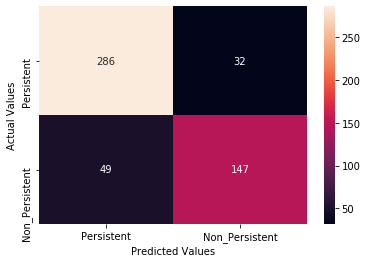

In [198]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='g',xticklabels=['Persistent','Non_Persistent'],yticklabels=['Persistent','Non_Persistent'])
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

##Applying Label Encoding tpo Test and Train Split and then determine if any changes in accuracy

In [0]:
X = df.drop(['Ptid','Persistency_Flag'],axis=1)
Y = df['Persistency_Flag']

In [200]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.15,random_state=1)
print(X_train.shape)
print(X_test.shape)

(2910, 67)
(514, 67)


In [201]:
label_encoder = LabelEncoder()
for col in X_train.columns:
  label_encoder.fit(X_train[col])
  X_train[col] = label_encoder.transform(X_train[col])
  

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [202]:
label_encoder = LabelEncoder()
for col in X_test.columns:
  label_encoder.fit(X_test[col])
  X_test[col] = label_encoder.transform(X_test[col])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [203]:
lr_cv.fit(X_train,y_train)

LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=1000, multi_class='auto', n_jobs=None,
                     penalty='l2', random_state=None, refit=True, scoring=None,
                     solver='lbfgs', tol=0.0001, verbose=0)

In [0]:
y_pred = lr_cv.predict(X_test)

In [205]:
print(f'Accuracy of the trained Model :{accuracy_score(y_pred,y_test)}')

Accuracy of the trained Model :0.8404669260700389


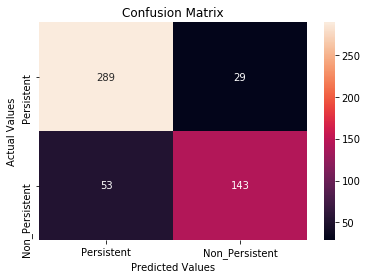

In [206]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='g',xticklabels=['Persistent','Non_Persistent'],yticklabels=['Persistent','Non_Persistent'])
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Confusion Matrix')
plt.show()

#### Note applying Label Encoding to Train and Test data separately didnt improve the performance much.

## Applying XGBOOST Classifier

In [0]:
import xgboost as xgb
from scipy import stats
clf_xgb = xgb.XGBClassifier(objective = 'binary:logistic')
param_dist = {'n_estimators': stats.randint(150, 1000),
              'learning_rate': stats.uniform(0.01, 0.6),
              'subsample': stats.uniform(0.3, 0.9),
              'max_depth': [3, 4, 5, 6, 7, 8, 9],
              'colsample_bytree': stats.uniform(0.5, 0.9),
              'min_child_weight': [1, 2, 3, 4]
             }

In [0]:
X = df.drop(['Ptid','Persistency_Flag'],axis=1)
Y = df['Persistency_Flag']

In [0]:
label_encoder = LabelEncoder()
for col in X.columns:
  X[col] = label_encoder.fit_transform(X[col])

In [210]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.15,random_state=1)
print(X_train.shape)
print(X_test.shape)

(2910, 67)
(514, 67)


In [211]:
xgb_clf = RandomizedSearchCV(clf_xgb, param_distributions = param_dist, n_iter = 25, scoring = 'roc_auc',verbose=2, n_jobs =4,cv=5)
xgb_clf.fit(X_train,y_train)


Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:   26.1s
[Parallel(n_jobs=4)]: Done 125 out of 125 | elapsed:  2.0min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1, sc...
                                        'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f68000f8240>,
                                        'max_dep

In [212]:
xgb_clf.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.9799295682853881, gamma=0,
              learning_rate=0.06708167270439497, max_delta_step=0, max_depth=4,
              min_child_weight=3, missing=None, n_estimators=366, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.4354594177330226, verbosity=1)

In [213]:
xgb_clf.best_params_

{'colsample_bytree': 0.9799295682853881,
 'learning_rate': 0.06708167270439497,
 'max_depth': 4,
 'min_child_weight': 3,
 'n_estimators': 366,
 'subsample': 0.4354594177330226}

In [0]:
y_pred = xgb_clf.predict(X_test)

In [215]:
print(f'Accuracy of the trained Model :{accuracy_score(y_pred,y_test)}')

Accuracy of the trained Model :0.8249027237354085


In [0]:
accuracy['XGBClassifier'] = accuracy_score(y_pred,y_test)

## Confusion Matrix

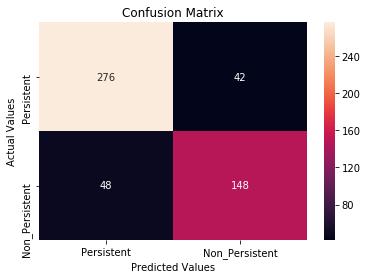

In [217]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='g',xticklabels=['Persistent','Non_Persistent'],yticklabels=['Persistent','Non_Persistent'])
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Confusion Matrix')
plt.show()

In [218]:
accuracy

{'LogisticRegressionCV': 0.8424124513618677,
 'RandomForestClassifier': 0.8501945525291829,
 'XGBClassifier': 0.8249027237354085}

In [0]:
model = []
score = []

for k,v in accuracy.items():
  model.append(k)
  score.append(v)


In [221]:
df_score = pd.DataFrame({'Classification_Model':model,'Accuracy_Score':score})
df_score

,Classification_Model,Accuracy_Score
0,RandomForestClassifier,0.850195
1,LogisticRegressionCV,0.842412
2,XGBClassifier,0.824903
